In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import datetime as dt
import pprint
sns.set()

### Get data

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.head()

,Zmienna_1,Zmienna_2,Zmienna_3,Zmienna_4,Zmienna_5,Zmienna_6,Zmienna_7,Zmienna_8,Zmienna_9,Zmienna_10,...,Zmienna_167,Zmienna_168,Zmienna_169,Zmienna_170,Zmienna_171,Zmienna_172,Zmienna_173,Zmienna_174,Zmienna_175,ID
0,1,61,1684,8.163934,19,1282,9.210526,0,0,0.0,...,14922.182574,21203.641147,17949.241924,26520.022513,1.330140e+08,3.0,2019.0,0.0,0.0,2121
1,1,9,4369,8.333333,2,2947,9.500000,0,0,0.0,...,9439.523662,14062.946501,11243.511315,15896.369369,6.664486e+07,10.0,2018.0,0.0,0.0,2841
2,1,72,3741,7.680556,43,3741,7.302326,0,0,0.0,...,9021.761926,13901.987091,10929.845206,15611.680122,8.279540e+07,11.0,2019.0,0.0,0.0,1110
3,1,28,778,8.928571,8,778,8.375000,0,0,0.0,...,9528.032705,13820.564860,15984.446057,21153.542988,1.303847e+08,1.0,2020.0,0.0,0.0,87
4,1,54,1385,7.111111,17,972,7.117647,0,0,0.0,...,10674.860665,15701.349062,14013.217340,20083.660077,1.078522e+08,2.0,2018.0,0.0,0.0,1797


In [4]:
pd.set_option('display.max_columns', None)
raw_data.describe(include='all')

,Zmienna_1,Zmienna_2,Zmienna_3,Zmienna_4,Zmienna_5,Zmienna_6,Zmienna_7,Zmienna_8,Zmienna_9,Zmienna_10,Zmienna_11,Zmienna_12,Zmienna_13,Zmienna_14,Zmienna_15,Zmienna_16,Zmienna_17,Zmienna_18,Zmienna_19,Zmienna_20,Zmienna_21,Zmienna_22,Zmienna_23,Zmienna_24,Zmienna_25,Zmienna_26,Zmienna_27,Zmienna_28,Zmienna_29,Zmienna_30,Zmienna_31,Zmienna_32,Zmienna_33,Zmienna_34,Zmienna_35,Zmienna_36,Zmienna_37,Zmienna_38,Zmienna_39,Zmienna_40,Zmienna_41,Zmienna_42,Zmienna_43,Zmienna_44,Zmienna_45,Zmienna_46,Zmienna_47,Zmienna_48,Zmienna_49,Zmienna_50,Zmienna_51,Zmienna_52,Zmienna_53,Zmienna_54,Zmienna_55,Zmienna_56,Zmienna_57,Zmienna_58,Zmienna_59,Zmienna_60,Zmienna_61,Zmienna_62,Zmienna_63,Zmienna_64,Zmienna_65,Zmienna_66,Zmienna_67,Zmienna_68,Zmienna_69,Zmienna_70,Zmienna_71,Zmienna_72,Zmienna_73,Zmienna_74,Zmienna_75,Zmienna_76,Zmienna_77,Zmienna_78,Zmienna_79,Zmienna_80,Zmienna_81,Zmienna_82,Zmienna_83,Zmienna_84,Zmienna_85,Zmienna_86,Zmienna_87,Zmienna_88,Zmienna_89,Zmienna_90,Zmienna_91,Zmienna_92,Zmienna_93,Zmienna_94,Zmienna_95,Zmienna_96,Zmienna_97,Zmienna_98,Zmienna_99,Zmienna_100,Zmienna_101,Zmienna_102,Zmienna_103,Zmienna_104,Zmienna_105,Zmienna_106,Zmienna_107,Zmienna_108,Zmienna_109,Zmienna_110,Zmienna_111,Zmienna_112,Zmienna_113,Zmienna_114,Zmienna_115,Zmienna_116,Zmienna_117,Zmienna_118,Zmienna_119,Zmienna_120,Zmienna_121,Zmienna_122,Zmienna_123,Zmienna_124,Zmienna_125,Zmienna_126,Zmienna_127,Zmienna_128,Zmienna_129,Zmienna_130,Zmienna_131,Zmienna_132,Zmienna_133,Zmienna_134,Zmienna_135,Zmienna_136,Zmienna_137,Zmienna_138,Zmienna_139,Zmienna_140,Zmienna_141,Zmienna_142,Zmienna_143,Zmienna_144,Zmienna_145,Zmienna_146,Zmienna_147,Zmienna_148,Zmienna_149,Zmienna_150,Zmienna_151,Zmienna_152,Zmienna_153,Zmienna_154,Zmienna_155,Zmienna_156,Zmienna_157,Zmienna_158,Zmienna_159,Zmienna_160,Zmienna_161,Zmienna_162,Zmienna_163,Zmienna_164,Zmienna_165,Zmienna_166,Zmienna_167,Zmienna_168,Zmienna_169,Zmienna_170,Zmienna_171,Zmienna_172,Zmienna_173,Zmienna_174,Zmienna_175,ID
count,4069.0,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.0,3735,4069.000000,4069.000000,4041.000000,4035.000000,3977.000000,4069.000000,4069.000000,4069.000000,4068,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4.069000e+03,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4.069000e+03,4069.000000,4.069000e+03,4069.0,4069.000000,4069.000000,4069.0,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.0,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.0

#### By visual look-up we can see two non-numeric variables. As there is only 16 unique occurances of 'Zmienna_22' I will convert it later to dummy variable. 'Zmienna_13' has 836 unique values, I will drop it. 

In [9]:
raw_data = raw_data.drop(['Zmienna_13'], axis=1)
raw_data.describe(include='all')

,Zmienna_1,Zmienna_2,Zmienna_3,Zmienna_4,Zmienna_5,Zmienna_6,Zmienna_7,Zmienna_8,Zmienna_9,Zmienna_10,Zmienna_11,Zmienna_12,Zmienna_14,Zmienna_15,Zmienna_16,Zmienna_17,Zmienna_18,Zmienna_19,Zmienna_20,Zmienna_21,Zmienna_22,Zmienna_23,Zmienna_24,Zmienna_25,Zmienna_26,Zmienna_27,Zmienna_28,Zmienna_29,Zmienna_30,Zmienna_31,Zmienna_32,Zmienna_33,Zmienna_34,Zmienna_35,Zmienna_36,Zmienna_37,Zmienna_38,Zmienna_39,Zmienna_40,Zmienna_41,Zmienna_42,Zmienna_43,Zmienna_44,Zmienna_45,Zmienna_46,Zmienna_47,Zmienna_48,Zmienna_49,Zmienna_50,Zmienna_51,Zmienna_52,Zmienna_53,Zmienna_54,Zmienna_55,Zmienna_56,Zmienna_57,Zmienna_58,Zmienna_59,Zmienna_60,Zmienna_61,Zmienna_62,Zmienna_63,Zmienna_64,Zmienna_65,Zmienna_66,Zmienna_67,Zmienna_68,Zmienna_69,Zmienna_70,Zmienna_71,Zmienna_72,Zmienna_73,Zmienna_74,Zmienna_75,Zmienna_76,Zmienna_77,Zmienna_78,Zmienna_79,Zmienna_80,Zmienna_81,Zmienna_82,Zmienna_83,Zmienna_84,Zmienna_85,Zmienna_86,Zmienna_87,Zmienna_88,Zmienna_89,Zmienna_90,Zmienna_91,Zmienna_92,Zmienna_93,Zmienna_94,Zmienna_95,Zmienna_96,Zmienna_97,Zmienna_98,Zmienna_99,Zmienna_100,Zmienna_101,Zmienna_102,Zmienna_103,Zmienna_104,Zmienna_105,Zmienna_106,Zmienna_107,Zmienna_108,Zmienna_109,Zmienna_110,Zmienna_111,Zmienna_112,Zmienna_113,Zmienna_114,Zmienna_115,Zmienna_116,Zmienna_117,Zmienna_118,Zmienna_119,Zmienna_120,Zmienna_121,Zmienna_122,Zmienna_123,Zmienna_124,Zmienna_125,Zmienna_126,Zmienna_127,Zmienna_128,Zmienna_129,Zmienna_130,Zmienna_131,Zmienna_132,Zmienna_133,Zmienna_134,Zmienna_135,Zmienna_136,Zmienna_137,Zmienna_138,Zmienna_139,Zmienna_140,Zmienna_141,Zmienna_142,Zmienna_143,Zmienna_144,Zmienna_145,Zmienna_146,Zmienna_147,Zmienna_148,Zmienna_149,Zmienna_150,Zmienna_151,Zmienna_152,Zmienna_153,Zmienna_154,Zmienna_155,Zmienna_156,Zmienna_157,Zmienna_158,Zmienna_159,Zmienna_160,Zmienna_161,Zmienna_162,Zmienna_163,Zmienna_164,Zmienna_165,Zmienna_166,Zmienna_167,Zmienna_168,Zmienna_169,Zmienna_170,Zmienna_171,Zmienna_172,Zmienna_173,Zmienna_174,Zmienna_175,ID
count,4069.0,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.0,4069.000000,4069.000000,4041.000000,4035.000000,3977.000000,4069.000000,4069.000000,4069.000000,4068,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4.069000e+03,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4.069000e+03,4069.000000,4.069000e+03,4069.0,4069.000000,4069.000000,4069.0,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.0,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4.069000e+

#### Checking for missing values

In [12]:
pd.set_option('display.max_rows', 200)
raw_data.describe()

,Zmienna_1,Zmienna_2,Zmienna_3,Zmienna_4,Zmienna_5,Zmienna_6,Zmienna_7,Zmienna_8,Zmienna_9,Zmienna_10,Zmienna_11,Zmienna_12,Zmienna_14,Zmienna_15,Zmienna_16,Zmienna_17,Zmienna_18,Zmienna_19,Zmienna_20,Zmienna_21,Zmienna_23,Zmienna_24,Zmienna_25,Zmienna_26,Zmienna_27,Zmienna_28,Zmienna_29,Zmienna_30,Zmienna_31,Zmienna_32,Zmienna_33,Zmienna_34,Zmienna_35,Zmienna_36,Zmienna_37,Zmienna_38,Zmienna_39,Zmienna_40,Zmienna_41,Zmienna_42,Zmienna_43,Zmienna_44,Zmienna_45,Zmienna_46,Zmienna_47,Zmienna_48,Zmienna_49,Zmienna_50,Zmienna_51,Zmienna_52,Zmienna_53,Zmienna_54,Zmienna_55,Zmienna_56,Zmienna_57,Zmienna_58,Zmienna_59,Zmienna_60,Zmienna_61,Zmienna_62,Zmienna_63,Zmienna_64,Zmienna_65,Zmienna_66,Zmienna_67,Zmienna_68,Zmienna_69,Zmienna_70,Zmienna_71,Zmienna_72,Zmienna_73,Zmienna_74,Zmienna_75,Zmienna_76,Zmienna_77,Zmienna_78,Zmienna_79,Zmienna_80,Zmienna_81,Zmienna_82,Zmienna_83,Zmienna_84,Zmienna_85,Zmienna_86,Zmienna_87,Zmienna_88,Zmienna_89,Zmienna_90,Zmienna_91,Zmienna_92,Zmienna_93,Zmienna_94,Zmienna_95,Zmienna_96,Zmienna_97,Zmienna_98,Zmienna_99,Zmienna_100,Zmienna_101,Zmienna_102,Zmienna_103,Zmienna_104,Zmienna_105,Zmienna_106,Zmienna_107,Zmienna_108,Zmienna_109,Zmienna_110,Zmienna_111,Zmienna_112,Zmienna_113,Zmienna_114,Zmienna_115,Zmienna_116,Zmienna_117,Zmienna_118,Zmienna_119,Zmienna_120,Zmienna_121,Zmienna_122,Zmienna_123,Zmienna_124,Zmienna_125,Zmienna_126,Zmienna_127,Zmienna_128,Zmienna_129,Zmienna_130,Zmienna_131,Zmienna_132,Zmienna_133,Zmienna_134,Zmienna_135,Zmienna_136,Zmienna_137,Zmienna_138,Zmienna_139,Zmienna_140,Zmienna_141,Zmienna_142,Zmienna_143,Zmienna_144,Zmienna_145,Zmienna_146,Zmienna_147,Zmienna_148,Zmienna_149,Zmienna_150,Zmienna_151,Zmienna_152,Zmienna_153,Zmienna_154,Zmienna_155,Zmienna_156,Zmienna_157,Zmienna_158,Zmienna_159,Zmienna_160,Zmienna_161,Zmienna_162,Zmienna_163,Zmienna_164,Zmienna_165,Zmienna_166,Zmienna_167,Zmienna_168,Zmienna_169,Zmienna_170,Zmienna_171,Zmienna_172,Zmienna_173,Zmienna_174,Zmienna_175,ID
count,4069.0,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.0,4069.000000,4069.000000,4041.000000,4035.000000,3977.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4.069000e+03,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4.069000e+03,4069.000000,4.069000e+03,4069.0,4069.000000,4069.000000,4069.0,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.0,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4.069000e+03,3735.000000,3

#### We can be concerned about 'Zmienna_172' and 'Zmienna 173' variables, as there are ~8% of missing values. After visual inspection we cas see, that null values are randomly spreaded, and always in pairs. As there is no good way to deal with those missing values, I will drop them. 

In [13]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe()

,Zmienna_1,Zmienna_2,Zmienna_3,Zmienna_4,Zmienna_5,Zmienna_6,Zmienna_7,Zmienna_8,Zmienna_9,Zmienna_10,Zmienna_11,Zmienna_12,Zmienna_14,Zmienna_15,Zmienna_16,Zmienna_17,Zmienna_18,Zmienna_19,Zmienna_20,Zmienna_21,Zmienna_23,Zmienna_24,Zmienna_25,Zmienna_26,Zmienna_27,Zmienna_28,Zmienna_29,Zmienna_30,Zmienna_31,Zmienna_32,Zmienna_33,Zmienna_34,Zmienna_35,Zmienna_36,Zmienna_37,Zmienna_38,Zmienna_39,Zmienna_40,Zmienna_41,Zmienna_42,Zmienna_43,Zmienna_44,Zmienna_45,Zmienna_46,Zmienna_47,Zmienna_48,Zmienna_49,Zmienna_50,Zmienna_51,Zmienna_52,Zmienna_53,Zmienna_54,Zmienna_55,Zmienna_56,Zmienna_57,Zmienna_58,Zmienna_59,Zmienna_60,Zmienna_61,Zmienna_62,Zmienna_63,Zmienna_64,Zmienna_65,Zmienna_66,Zmienna_67,Zmienna_68,Zmienna_69,Zmienna_70,Zmienna_71,Zmienna_72,Zmienna_73,Zmienna_74,Zmienna_75,Zmienna_76,Zmienna_77,Zmienna_78,Zmienna_79,Zmienna_80,Zmienna_81,Zmienna_82,Zmienna_83,Zmienna_84,Zmienna_85,Zmienna_86,Zmienna_87,Zmienna_88,Zmienna_89,Zmienna_90,Zmienna_91,Zmienna_92,Zmienna_93,Zmienna_94,Zmienna_95,Zmienna_96,Zmienna_97,Zmienna_98,Zmienna_99,Zmienna_100,Zmienna_101,Zmienna_102,Zmienna_103,Zmienna_104,Zmienna_105,Zmienna_106,Zmienna_107,Zmienna_108,Zmienna_109,Zmienna_110,Zmienna_111,Zmienna_112,Zmienna_113,Zmienna_114,Zmienna_115,Zmienna_116,Zmienna_117,Zmienna_118,Zmienna_119,Zmienna_120,Zmienna_121,Zmienna_122,Zmienna_123,Zmienna_124,Zmienna_125,Zmienna_126,Zmienna_127,Zmienna_128,Zmienna_129,Zmienna_130,Zmienna_131,Zmienna_132,Zmienna_133,Zmienna_134,Zmienna_135,Zmienna_136,Zmienna_137,Zmienna_138,Zmienna_139,Zmienna_140,Zmienna_141,Zmienna_142,Zmienna_143,Zmienna_144,Zmienna_145,Zmienna_146,Zmienna_147,Zmienna_148,Zmienna_149,Zmienna_150,Zmienna_151,Zmienna_152,Zmienna_153,Zmienna_154,Zmienna_155,Zmienna_156,Zmienna_157,Zmienna_158,Zmienna_159,Zmienna_160,Zmienna_161,Zmienna_162,Zmienna_163,Zmienna_164,Zmienna_165,Zmienna_166,Zmienna_167,Zmienna_168,Zmienna_169,Zmienna_170,Zmienna_171,Zmienna_172,Zmienna_173,Zmienna_174,Zmienna_175,ID
count,3629.0,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.0,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.00000,3629.000000,3629.000000,3629.000000,3629.00000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3.629000e+03,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3.629000e+03,3629.000000,3.629000e+03,3629.0,3629.000000,3629.000000,3629.0,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.0,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3.629000e+03,3629.000000,362

#### Column 'ID' is not described as variable, also describe() function shows, that at 25%, 50%, 75% it represents number of rows. I will drop it, as it show no value to analysis. 

In [30]:
data_no_mv = data_no_mv.drop(['ID'], axis=1)
data_no_mv.describe(include='all')

KeyError: "['ID'] not found in axis"

In [31]:
data_no_mv.describe(include='all')

,Zmienna_1,Zmienna_2,Zmienna_3,Zmienna_4,Zmienna_5,Zmienna_6,Zmienna_7,Zmienna_8,Zmienna_9,Zmienna_10,Zmienna_11,Zmienna_12,Zmienna_14,Zmienna_15,Zmienna_16,Zmienna_17,Zmienna_18,Zmienna_19,Zmienna_20,Zmienna_21,Zmienna_22,Zmienna_23,Zmienna_24,Zmienna_25,Zmienna_26,Zmienna_27,Zmienna_28,Zmienna_29,Zmienna_30,Zmienna_31,Zmienna_32,Zmienna_33,Zmienna_34,Zmienna_35,Zmienna_36,Zmienna_37,Zmienna_38,Zmienna_39,Zmienna_40,Zmienna_41,Zmienna_42,Zmienna_43,Zmienna_44,Zmienna_45,Zmienna_46,Zmienna_47,Zmienna_48,Zmienna_49,Zmienna_50,Zmienna_51,Zmienna_52,Zmienna_53,Zmienna_54,Zmienna_55,Zmienna_56,Zmienna_57,Zmienna_58,Zmienna_59,Zmienna_60,Zmienna_61,Zmienna_62,Zmienna_63,Zmienna_64,Zmienna_65,Zmienna_66,Zmienna_67,Zmienna_68,Zmienna_69,Zmienna_70,Zmienna_71,Zmienna_72,Zmienna_73,Zmienna_74,Zmienna_75,Zmienna_76,Zmienna_77,Zmienna_78,Zmienna_79,Zmienna_80,Zmienna_81,Zmienna_82,Zmienna_83,Zmienna_84,Zmienna_85,Zmienna_86,Zmienna_87,Zmienna_88,Zmienna_89,Zmienna_90,Zmienna_91,Zmienna_92,Zmienna_93,Zmienna_94,Zmienna_95,Zmienna_96,Zmienna_97,Zmienna_98,Zmienna_99,Zmienna_100,Zmienna_101,Zmienna_102,Zmienna_103,Zmienna_104,Zmienna_105,Zmienna_106,Zmienna_107,Zmienna_108,Zmienna_109,Zmienna_110,Zmienna_111,Zmienna_112,Zmienna_113,Zmienna_114,Zmienna_115,Zmienna_116,Zmienna_117,Zmienna_118,Zmienna_119,Zmienna_120,Zmienna_121,Zmienna_122,Zmienna_123,Zmienna_124,Zmienna_125,Zmienna_126,Zmienna_127,Zmienna_128,Zmienna_129,Zmienna_130,Zmienna_131,Zmienna_132,Zmienna_133,Zmienna_134,Zmienna_135,Zmienna_136,Zmienna_137,Zmienna_138,Zmienna_139,Zmienna_140,Zmienna_141,Zmienna_142,Zmienna_143,Zmienna_144,Zmienna_145,Zmienna_146,Zmienna_147,Zmienna_148,Zmienna_149,Zmienna_150,Zmienna_151,Zmienna_152,Zmienna_153,Zmienna_154,Zmienna_155,Zmienna_156,Zmienna_157,Zmienna_158,Zmienna_159,Zmienna_160,Zmienna_161,Zmienna_162,Zmienna_163,Zmienna_164,Zmienna_165,Zmienna_166,Zmienna_167,Zmienna_168,Zmienna_169,Zmienna_170,Zmienna_171,Zmienna_172,Zmienna_173,Zmienna_174,Zmienna_175
count,3629.0,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.0,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.00000,3629.000000,3629.000000,3629.000000,3629.00000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3.629000e+03,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3.629000e+03,3629.000000,3.629000e+03,3629.0,3629.000000,3629.000000,3629.0,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.0,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3.629000e+03,36

#### Adding dummies to categorical variable 'Zmienna_22'

In [32]:
data_with_dummies = pd.get_dummies(data_no_mv,drop_first=True)
data_with_dummies.describe()

,Zmienna_1,Zmienna_2,Zmienna_3,Zmienna_4,Zmienna_5,Zmienna_6,Zmienna_7,Zmienna_8,Zmienna_9,Zmienna_10,Zmienna_11,Zmienna_12,Zmienna_14,Zmienna_15,Zmienna_16,Zmienna_17,Zmienna_18,Zmienna_19,Zmienna_20,Zmienna_21,Zmienna_23,Zmienna_24,Zmienna_25,Zmienna_26,Zmienna_27,Zmienna_28,Zmienna_29,Zmienna_30,Zmienna_31,Zmienna_32,Zmienna_33,Zmienna_34,Zmienna_35,Zmienna_36,Zmienna_37,Zmienna_38,Zmienna_39,Zmienna_40,Zmienna_41,Zmienna_42,Zmienna_43,Zmienna_44,Zmienna_45,Zmienna_46,Zmienna_47,Zmienna_48,Zmienna_49,Zmienna_50,Zmienna_51,Zmienna_52,Zmienna_53,Zmienna_54,Zmienna_55,Zmienna_56,Zmienna_57,Zmienna_58,Zmienna_59,Zmienna_60,Zmienna_61,Zmienna_62,Zmienna_63,Zmienna_64,Zmienna_65,Zmienna_66,Zmienna_67,Zmienna_68,Zmienna_69,Zmienna_70,Zmienna_71,Zmienna_72,Zmienna_73,Zmienna_74,Zmienna_75,Zmienna_76,Zmienna_77,Zmienna_78,Zmienna_79,Zmienna_80,Zmienna_81,Zmienna_82,Zmienna_83,Zmienna_84,Zmienna_85,Zmienna_86,Zmienna_87,Zmienna_88,Zmienna_89,Zmienna_90,Zmienna_91,Zmienna_92,Zmienna_93,Zmienna_94,Zmienna_95,Zmienna_96,Zmienna_97,Zmienna_98,Zmienna_99,Zmienna_100,Zmienna_101,Zmienna_102,Zmienna_103,Zmienna_104,Zmienna_105,Zmienna_106,Zmienna_107,Zmienna_108,Zmienna_109,Zmienna_110,Zmienna_111,Zmienna_112,Zmienna_113,Zmienna_114,Zmienna_115,Zmienna_116,Zmienna_117,Zmienna_118,Zmienna_119,Zmienna_120,Zmienna_121,Zmienna_122,Zmienna_123,Zmienna_124,Zmienna_125,Zmienna_126,Zmienna_127,Zmienna_128,Zmienna_129,Zmienna_130,Zmienna_131,Zmienna_132,Zmienna_133,Zmienna_134,Zmienna_135,Zmienna_136,Zmienna_137,Zmienna_138,Zmienna_139,Zmienna_140,Zmienna_141,Zmienna_142,Zmienna_143,Zmienna_144,Zmienna_145,Zmienna_146,Zmienna_147,Zmienna_148,Zmienna_149,Zmienna_150,Zmienna_151,Zmienna_152,Zmienna_153,Zmienna_154,Zmienna_155,Zmienna_156,Zmienna_157,Zmienna_158,Zmienna_159,Zmienna_160,Zmienna_161,Zmienna_162,Zmienna_163,Zmienna_164,Zmienna_165,Zmienna_166,Zmienna_167,Zmienna_168,Zmienna_169,Zmienna_170,Zmienna_171,Zmienna_172,Zmienna_173,Zmienna_174,Zmienna_175,Zmienna_22_KUJAWSKO-POMORSKIE,Zmienna_22_LUBELSKIE,Zmienna_22_LUBUSKIE,Zmienna_22_MAZOWIECKIE,Zmienna_22_MAŁOPOLSKIE,Zmienna_22_OPOLSKIE,Zmienna_22_PODKARPACKIE,Zmienna_22_PODLASKIE,Zmienna_22_POMORSKIE,Zmienna_22_WARMIŃSKO-MAZURSKIE,Zmienna_22_WIELKOPOLSKIE,Zmienna_22_ZACHODNIOPOMORSKIE,Zmienna_22_ŁÓDZKIE,Zmienna_22_ŚLĄSKIE,Zmienna_22_ŚWIĘTOKRZYSKIE
count,3629.0,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.0,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.00000,3629.000000,3629.000000,3629.000000,3629.00000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3.629000e+03,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3629.000000,3.629000e+03,3629.000000,3.629000e+03,3629.0,3629.000000,3629.000000,3629.0,3629.000000,3629.000000,3629.000000,3629.0000

#### Checking variables that are correlated with 'Zmienna_20'

In [33]:
col_names = list(data_with_dummies.columns)

correlation_dictionary = { }
correlation_list = []

for column in col_names:
    correlation_value = round(data_with_dummies['Zmienna_20'].corr(data_with_dummies[column]),10)
    correlation_dictionary.update({column : correlation_value})
    correlation_list.append(correlation_value)

In [37]:
cleaned_correlation_list = [x for x in correlation_list if str(x) != 'nan']
cleaned_correlation_list.sort(reverse=True)

In [43]:
for i in cleaned_correlation_list:
    for key, value in correlation_dictionary.items():
        if i == value:
            print(key + "\tcorrelation with Zmienna_20\t" + str(i))

Zmienna_20	correlation with Zmienna_20	1.0
Zmienna_15	correlation with Zmienna_20	0.3865748573
Zmienna_167	correlation with Zmienna_20	0.3336168665
Zmienna_169	correlation with Zmienna_20	0.3070167083
Zmienna_158	correlation with Zmienna_20	0.3040353622
Zmienna_82	correlation with Zmienna_20	0.3013609175
Zmienna_168	correlation with Zmienna_20	0.3010690179
Zmienna_77	correlation with Zmienna_20	0.2979839164
Zmienna_170	correlation with Zmienna_20	0.2957709347
Zmienna_72	correlation with Zmienna_20	0.2950142228
Zmienna_23	correlation with Zmienna_20	0.2913408242
Zmienna_67	correlation with Zmienna_20	0.2847755194
Zmienna_160	correlation with Zmienna_20	0.283210933
Zmienna_161	correlation with Zmienna_20	0.2728645578
Zmienna_159	correlation with Zmienna_20	0.2720487084
Zmienna_151	correlation with Zmienna_20	0.2600548935
Zmienna_133	correlation with Zmienna_20	0.2547142076
Zmienna_124	correlation with Zmienna_20	0.2536413561
Zmienna_123	correlation with Zmienna_20	0.2536361116
Zmienna_92

#### Choosing variables for model. Checking p-values, and selecting those with (P>|t|) < 5%

In [40]:
y = data_with_dummies['Zmienna_20']
x1 = data_with_dummies.drop(['Zmienna_20'], axis=1)

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\Tomek\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Zmienna_20   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     17.76
Date:                Sun, 16 Feb 2020   Prob (F-statistic):               0.00
Time:                        01:47:23   Log-Likelihood:                -37981.
No. Observations:                3629   AIC:                         7.630e+04
Df Residuals:                    3462   BIC:                         7.733e+04
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Zmienna_1                      -4.558e+04    2.3e+05     -0.198      0.843   -4.97e+05    4.06e+05
Zmienna_2                          2.0587      4.064      0.507      0.612      -5.909      10.027
Zmienna_3                         -0.4809      0.212     -2.271      0.023      -0.896      -0.066
Zmienna_4                        359.7632    168.636      2.133      0.033      29.126     690.400
Zmienna_5                          3.6139     12.123      0.298      0.766     -20.155      27.382
Zmienna_6                          0.6363      0.247      2.581      0.010       0.153       1.120
Zmienna_7                        108.7011    115.912      0.938      0.348    -118.562     335.964
Zmienna_8                       -229.3928     80.820     -2.838      0.005    -387.853     -70.933
Zmienna_9                         -3.0217      0.893     -3.384      0.001      -4.772      -1.271
Zmienna_10                     -1519.5954    104.415    -14.553      0.000   -1724.316   -1314.875
Zmienna_11                      -342.1615    351.296     -0.974      0.330   -1030.929     346.606
Zmienna_12                     -3.951e+04   2.32e+05     -0.170      0.865   -4.95e+05    4.16e+05
Zmienna_14                      1352.2396    801.873      1.686      0.092    -219.952    2924.431
Zmienna_15                       127.3597      6.415     19.852      0.000     114.781     139.938
Zmienna_16                      2591.3681    845.741      3.064      0.002     933.166    4249.570
Zmienna_17                      -503.4540     95.345     -5.280      0.000    -690.392    -316.516
Zmienna_18                        99.9617     13.378      7.472      0.000      73.731     126.192
Zmienna_19                      -674.6920    777.067     -0.868      0.385   -2198.247     848.863
Zmienna_21                        -1.5482      0.985     -1.572      0.116      -3.479       0.382
Zmienna_23                        94.3464    139.246      0.678      0.498    -178.666     367.359
Zmienna_24                     -4.275e+06   2.78e+06     -1.539      0.124   -9.72e+06    1.17e+06
Zmienna_25                        17.8865     37.415      0.478      0.633     -55.472      91.245
Zmienna_26                       -46.5187    289.018     -0.161      0.872    -613.181     520.144
Zmienna_27                        11.6746    232.509      0.050      0.960    -444.193     467.542
Zmienna_28                       336.2002   2030.571      0.166      0.869   -3645.038    4317.438
Zmienna_29                       -34.0906    203.330     -0.168      0.867    -432.749     364.568
Zmienna_30                       503.7853    278.382      1.810      0.070     -42.024    1049.594
Zmienna_31                       212.7022    250.461      0.849      0.396    -278.364     703.768
Zmienna_32    

#### Variables for a model: 
Zmienna_3
Zmienna_4
Zmienna_6
Zmienna_8
Zmienna_9
Zmienna_10
Zmienna_15
Zmienna_16
Zmienna_17
Zmienna_18
Zmienna_47
Zmienna_52
Zmienna_59
Zmienna_62
Zmienna_90
Zmienna_101
Zmienna_102
Zmienna_108
Zmienna_110
Zmienna_111
Zmienna_114
Zmienna_131
Zmienna_174
Zmienna_175
Zmienna_22_KUJAWSKO-POMORSKIE
Zmienna_22_POMORSKIE
Zmienna_22_ZACHODNIOPOMORSKIE
Zmienna_22_ŚLĄSKIE

In [50]:
data_preprocessed = data_with_dummies[['Zmienna_3','Zmienna_4','Zmienna_6','Zmienna_8','Zmienna_9','Zmienna_10','Zmienna_15','Zmienna_16','Zmienna_17','Zmienna_18','Zmienna_47','Zmienna_52','Zmienna_59','Zmienna_62','Zmienna_90','Zmienna_101','Zmienna_102','Zmienna_108','Zmienna_110','Zmienna_111','Zmienna_114','Zmienna_131','Zmienna_174','Zmienna_175','Zmienna_22_KUJAWSKO-POMORSKIE','Zmienna_22_POMORSKIE','Zmienna_22_ZACHODNIOPOMORSKIE','Zmienna_22_ŚLĄSKIE']]

#### Multicolinearity check

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(data_preprocessed.values, i) for i in range(data_preprocessed.shape[1])]
vif["features"] = data_preprocessed.columns
vif

,VIF,features
0,7.064348,Zmienna_3
1,35.756156,Zmienna_4
2,5.877521,Zmienna_6
3,1.867665,Zmienna_8
4,9.784017,Zmienna_9
5,9.224948,Zmienna_10
6,9.149812,Zmienna_15
7,55.732889,Zmienna_16
8,2.413194,Zmienna_17
9,12.762761,Zmienna_18


#### As multicollinearity occurs, I'll remove those with VIF higher that 5

In [150]:
data_final = data_preprocessed[['Zmienna_8','Zmienna_17','Zmienna_47','Zmienna_52','Zmienna_59','Zmienna_101','Zmienna_102','Zmienna_108','Zmienna_110','Zmienna_111','Zmienna_114']]

# data_final = data_preprocessed[['Zmienna_8','Zmienna_17','Zmienna_47','Zmienna_52','Zmienna_59','Zmienna_101','Zmienna_102','Zmienna_108','Zmienna_110','Zmienna_111','Zmienna_114']]


## Linear regression model


In [151]:
targets = data_with_dummies['Zmienna_20']
inputs = data_preprocessed

#### Scale the data

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [153]:
inputs_scaled = scaler.transform(inputs)

#### Create the regression

In [191]:
reg = LinearRegression()
reg.fit(inputs,targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Check predictions to actual values (closer to 45 degree line = better)

In [155]:
targets_predict = reg.predict(inputs)

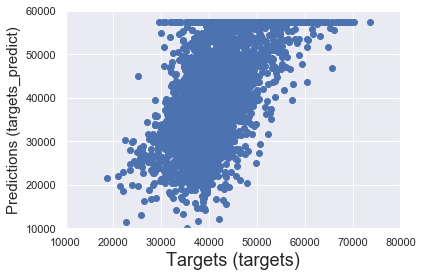

In [156]:
plt.scatter(targets_predict,targets)
plt.xlabel('Targets (targets)',size=18)
plt.ylabel('Predictions (targets_predict)',size=15)
plt.xlim(10000,80000)
plt.ylim(10000,60000)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

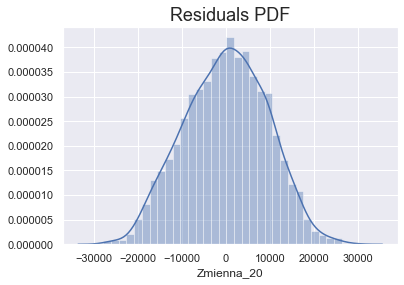

In [157]:
sns.distplot(targets_predict - targets)
plt.title("Residuals PDF", size=18)

In [158]:
reg.score(inputs,targets)

0.3418910529948085

#### Weights and biases

In [159]:
reg.intercept_

11428.351653975798

In [160]:
reg.coef_

array([-4.86500519e-01,  4.95534131e+02,  8.84626668e-01, -1.80796997e+02,
       -3.74633742e+00, -1.79740214e+03,  1.40542875e+02,  1.88285257e+03,
       -4.32727631e+02,  9.21427800e+01, -7.63242233e+02, -7.54691260e+02,
        5.92581907e-01,  1.94702534e+00,  5.24805180e-02, -2.74733395e+02,
        4.14850831e+02,  1.84813442e+03,  8.95324718e+02,  5.12032440e+02,
       -2.35858492e+03, -5.38813398e-02,  1.23638966e-04,  3.70403942e-01,
       -2.82265358e+00,  2.21750983e+03,  3.69200282e+03, -3.20595771e+03])

In [161]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Zmienna_3,-0.486501
1,Zmienna_4,495.534131
2,Zmienna_6,0.884627
3,Zmienna_8,-180.796997
4,Zmienna_9,-3.746337
5,Zmienna_10,-1797.402141
6,Zmienna_15,140.542875
7,Zmienna_16,1882.852565
8,Zmienna_17,-432.727631
9,Zmienna_18,92.142780


#### Mean Absolute Error (MAE)

In [141]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(targets, targets_predict)

7635.219514715356

#### Mean Squared Error (RMSE)

In [143]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(targets, targets_predict))
rms

9376.554324878734

#### R^2

In [144]:
from sklearn.metrics import r2_score
r2_score(targets, targets_predict)

0.3418910529948085

#### Testing on test.cvs data

In [148]:
test_data = pd.read_csv('test.csv')
test_data.describe()

,Zmienna_1,Zmienna_2,Zmienna_3,Zmienna_4,Zmienna_5,Zmienna_6,Zmienna_7,Zmienna_8,Zmienna_9,Zmienna_10,Zmienna_11,Zmienna_12,Zmienna_14,Zmienna_15,Zmienna_16,Zmienna_17,Zmienna_18,Zmienna_19,Zmienna_21,Zmienna_23,Zmienna_24,Zmienna_25,Zmienna_26,Zmienna_27,Zmienna_28,Zmienna_29,Zmienna_30,Zmienna_31,Zmienna_32,Zmienna_33,Zmienna_34,Zmienna_35,Zmienna_36,Zmienna_37,Zmienna_38,Zmienna_39,Zmienna_40,Zmienna_41,Zmienna_42,Zmienna_43,Zmienna_44,Zmienna_45,Zmienna_46,Zmienna_47,Zmienna_48,Zmienna_49,Zmienna_50,Zmienna_51,Zmienna_52,Zmienna_53,Zmienna_54,Zmienna_55,Zmienna_56,Zmienna_57,Zmienna_58,Zmienna_59,Zmienna_60,Zmienna_61,Zmienna_62,Zmienna_63,Zmienna_64,Zmienna_65,Zmienna_66,Zmienna_67,Zmienna_68,Zmienna_69,Zmienna_70,Zmienna_71,Zmienna_72,Zmienna_73,Zmienna_74,Zmienna_75,Zmienna_76,Zmienna_77,Zmienna_78,Zmienna_79,Zmienna_80,Zmienna_81,Zmienna_82,Zmienna_83,Zmienna_84,Zmienna_85,Zmienna_86,Zmienna_87,Zmienna_88,Zmienna_89,Zmienna_90,Zmienna_91,Zmienna_92,Zmienna_93,Zmienna_94,Zmienna_95,Zmienna_96,Zmienna_97,Zmienna_98,Zmienna_99,Zmienna_100,Zmienna_101,Zmienna_102,Zmienna_103,Zmienna_104,Zmienna_105,Zmienna_106,Zmienna_107,Zmienna_108,Zmienna_109,Zmienna_110,Zmienna_111,Zmienna_112,Zmienna_113,Zmienna_114,Zmienna_115,Zmienna_116,Zmienna_117,Zmienna_118,Zmienna_119,Zmienna_120,Zmienna_121,Zmienna_122,Zmienna_123,Zmienna_124,Zmienna_125,Zmienna_126,Zmienna_127,Zmienna_128,Zmienna_129,Zmienna_130,Zmienna_131,Zmienna_132,Zmienna_133,Zmienna_134,Zmienna_135,Zmienna_136,Zmienna_137,Zmienna_138,Zmienna_139,Zmienna_140,Zmienna_141,Zmienna_142,Zmienna_143,Zmienna_144,Zmienna_145,Zmienna_146,Zmienna_147,Zmienna_148,Zmienna_149,Zmienna_150,Zmienna_151,Zmienna_152,Zmienna_153,Zmienna_154,Zmienna_155,Zmienna_156,Zmienna_157,Zmienna_158,Zmienna_159,Zmienna_160,Zmienna_161,Zmienna_162,Zmienna_163,Zmienna_164,Zmienna_165,Zmienna_166,Zmienna_167,Zmienna_168,Zmienna_169,Zmienna_170,Zmienna_171,Zmienna_172,Zmienna_173,Zmienna_174,Zmienna_175,ID
count,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.00000,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,1013.000000,1011.000000,998.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.00000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1.017000e+03,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1.017000e+03,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1.017000e+03,915.000000,915.00000,1.017000e+03,1017.000000

In [163]:
test_inputs = test_data[['Zmienna_8','Zmienna_17','Zmienna_47','Zmienna_52','Zmienna_59','Zmienna_101','Zmienna_102','Zmienna_108','Zmienna_110','Zmienna_111','Zmienna_114']]


In [170]:
test_inputs.isnull().sum()

Zmienna_8      0
Zmienna_17     6
Zmienna_47     0
Zmienna_52     0
Zmienna_59     0
Zmienna_101    0
Zmienna_102    0
Zmienna_108    0
Zmienna_110    0
Zmienna_111    0
Zmienna_114    0
dtype: int64

In [188]:
test_inputs_no_mv = test_inputs.dropna(axis=0)

In [189]:
scaler.fit(test_inputs_no_mv)
test_inputs_scaled = scaler.transform(test_inputs_no_mv)

In [192]:
test_target_predicts = reg.predict(test_inputs_scaled)

ValueError: shapes (1011,11) and (28,) not aligned: 11 (dim 1) != 28 (dim 0)

#### Conclusion

The model has score of R^2 test of 0.3418, so it's not so good. It could be improved by selecting another values for it. 